In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Week03/datasets/covid2021.xlsx")
df.head()

,Date,Suspect
0,2021-06-24,157
1,2021-06-25,163
2,2021-06-26,139
3,2021-06-27,89
4,2021-06-28,145


In [3]:
df.isnull().sum()

Date       0
Suspect    0
dtype: int64

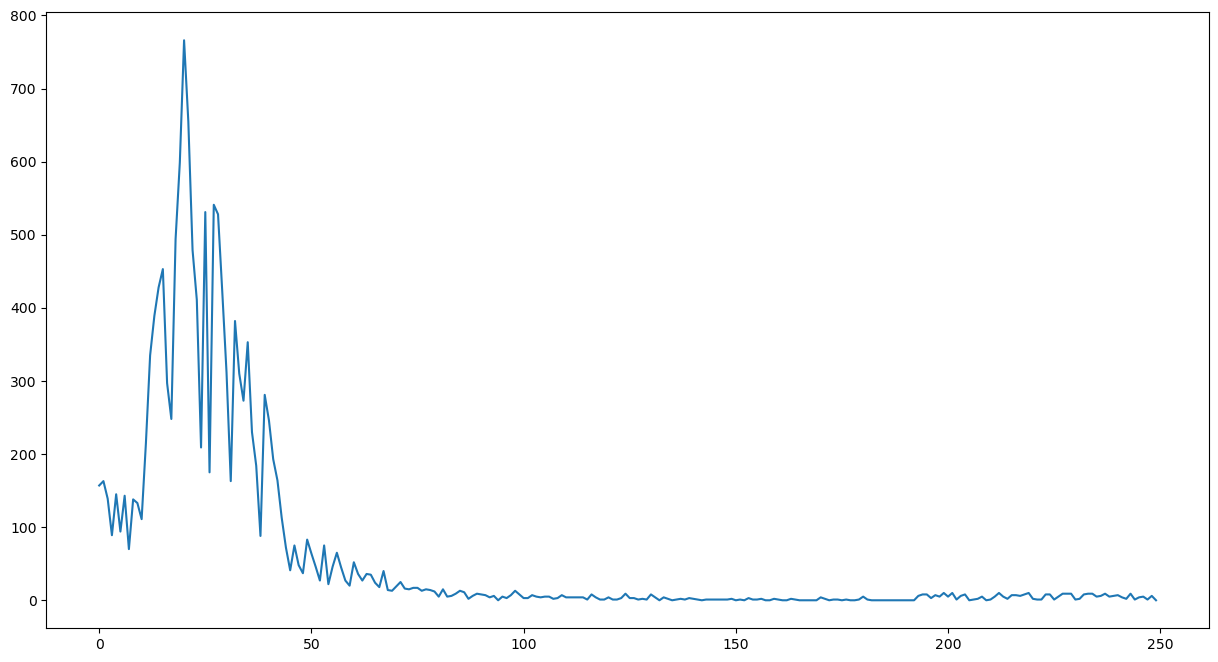

In [4]:
plt.figure(figsize=(15, 8))
plt.plot(df['Suspect'])
plt.show()

In [5]:
df['Date'] = df.index

In [6]:
df['Date'] = df[("Date")].values.astype("float64")

In [7]:
column = ["Date", "Suspect"]
x = df[column]
y = df["Suspect"]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=0)

In [9]:
mms = MinMaxScaler()
x_train_norm = mms.fit_transform(x_train)
x_test_norm = mms.transform(x_test)

In [10]:
model = LinearRegression(fit_intercept=False)
model.fit(x,y)
df['Prediction'] = model.predict(x)

<Axes: >

<Figure size 1500x800 with 0 Axes>

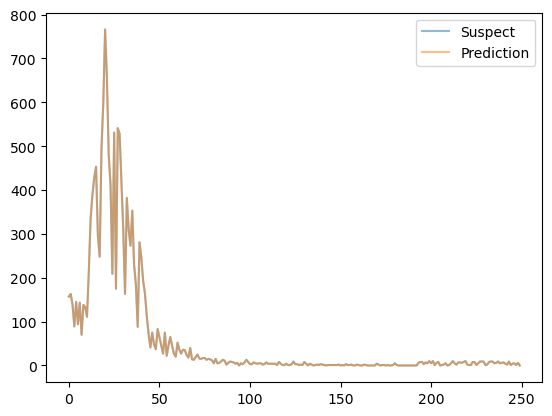

In [11]:
plt.figure(figsize=(15, 8))
df[['Suspect', 'Prediction']].plot(alpha=0.5)

In [12]:
params = pd.Series(model.coef_, index=x.columns)
params

Date       3.997200e-16
Suspect    1.000000e+00
dtype: float64

In [13]:
print("Model slope: ", model.coef_[0])
print("Model Intercept: ", model.intercept_)

Model slope:  3.997199716503446e-16
Model Intercept:  0.0


In [16]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [17]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010479,0.003795,0.000332,0.000664,0.0001,{'alpha': 0.0001},-3.992334e-09,-5.723586e-09,-3.158465e-09,-2.977567e-09,...,-4.081045e-09,9.997626e-10,1,-3.767957e-09,-4.440120e-09,-3.767483e-09,-3.717662e-09,-4.028505e-09,-3.944345e-09,2.707967e-10
1,0.005237,0.004602,0.003635,0.004862,0.001,{'alpha': 0.001},-3.992393e-08,-5.723671e-08,-3.158469e-08,-2.977531e-08,...,-4.081074e-08,9.997998e-09,2,-3.768016e-08,-4.440191e-08,-3.767475e-08,-3.717643e-08,-4.028537e-08,-3.944373e-08,2.708212e-09
2,0.005691,0.007251,0.003749,0.004806,0.01,{'alpha': 0.01},-3.992403e-07,-5.723678e-07,-3.158470e-07,-2.977528e-07,...,-4.081078e-07,9.998028e-08,3,-3.768025e-07,-4.440197e-07,-3.767475e-07,-3.717641e-07,-4.028539e-07,-3.944376e-07,2.708227e-08
3,0.004207,0.003849,0.002418,0.003294,0.05,{'alpha': 0.05},-1.996202e-06,-2.861839e-06,-1.579235e-06,-1.488764e-06,...,-2.040539e-06,4.999015e-07,4,-1.884013e-06,-2.220099e-06,-1.883737e-06,-1.858820e-06,-2.014270e-06,-1.972188e-06,1.354114e-07
4,0.005967,0.003376,0.004860,0.005196,0.1,{'alpha': 0.1},-3.992403e-06,-5.723678e-06,-3.158470e-06,-2.977528e-06,...,-4.081077e-06,9.998029e-07,5,-3.768025e-06,-4.440197e-06,-3.767475e-06,-3.717641e-06,-4.028539e-06,-3.944375e-06,2.708228e-07


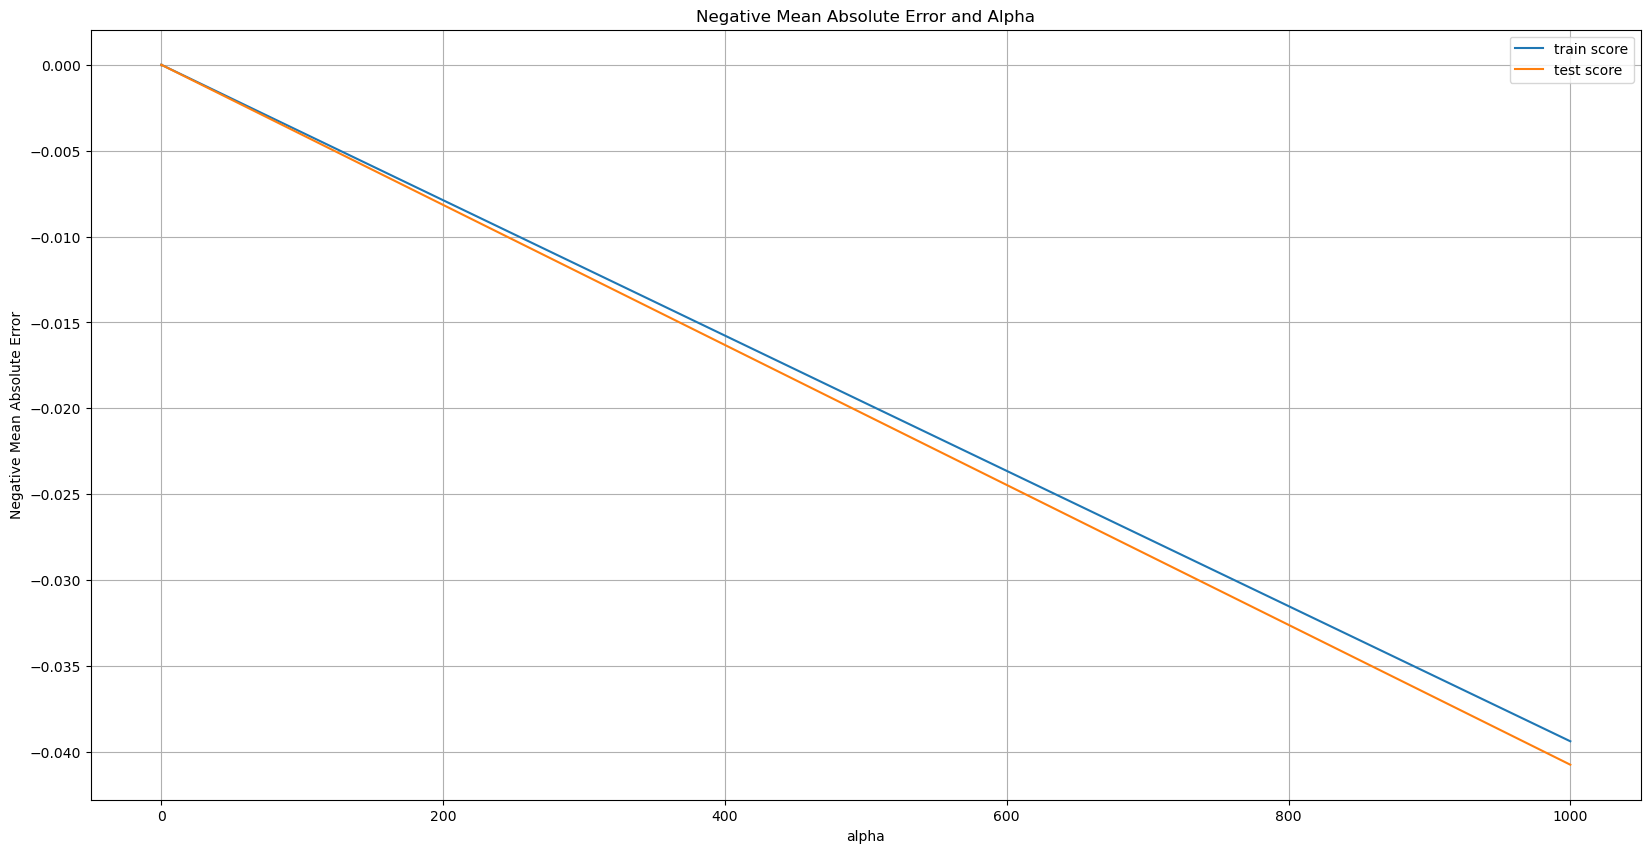

In [18]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [19]:
cv_results = cv_results[cv_results['param_alpha'] <= 200]

<Figure size 2000x1000 with 0 Axes>

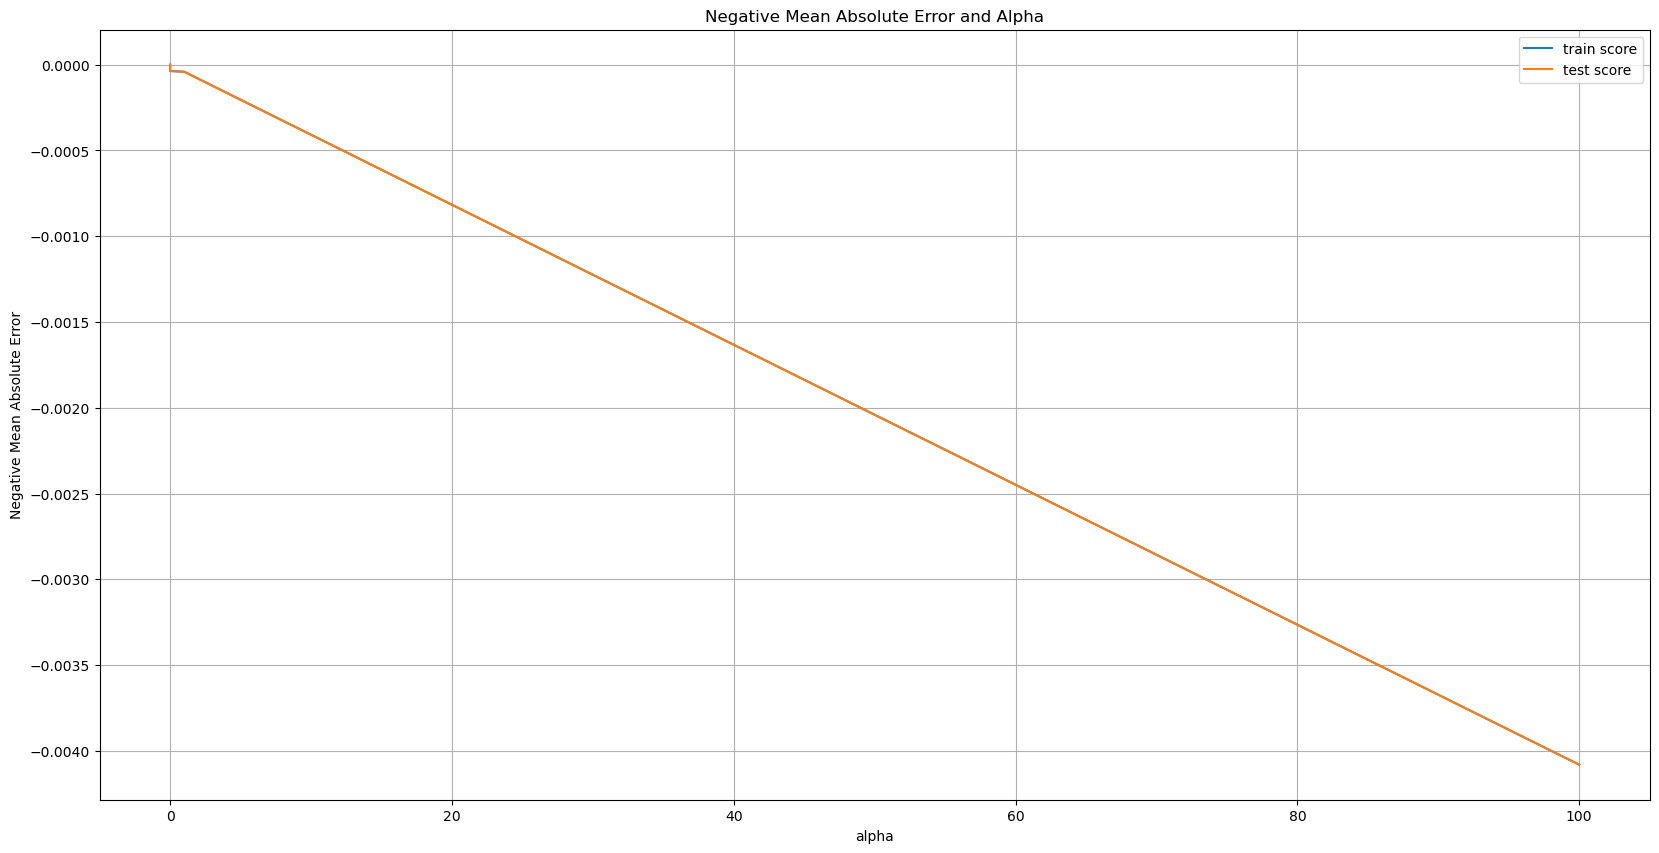

In [20]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

plt.figure(figsize=(20, 10))
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [21]:
alpha = 15
ridge = Ridge(alpha=alpha)
ridge.fit(x_train, y_train)
ridge.coef_

array([-6.64007019e-06,  9.99993941e-01])

In [22]:
imp_ridge = pd.DataFrame({
    "Varname": x.columns,
    "Coefficient": ridge.coef_
})

imp_ridge.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
1,Suspect,0.999994
0,Date,-0.000007


In [23]:
y_pred = ridge.predict(x_test)

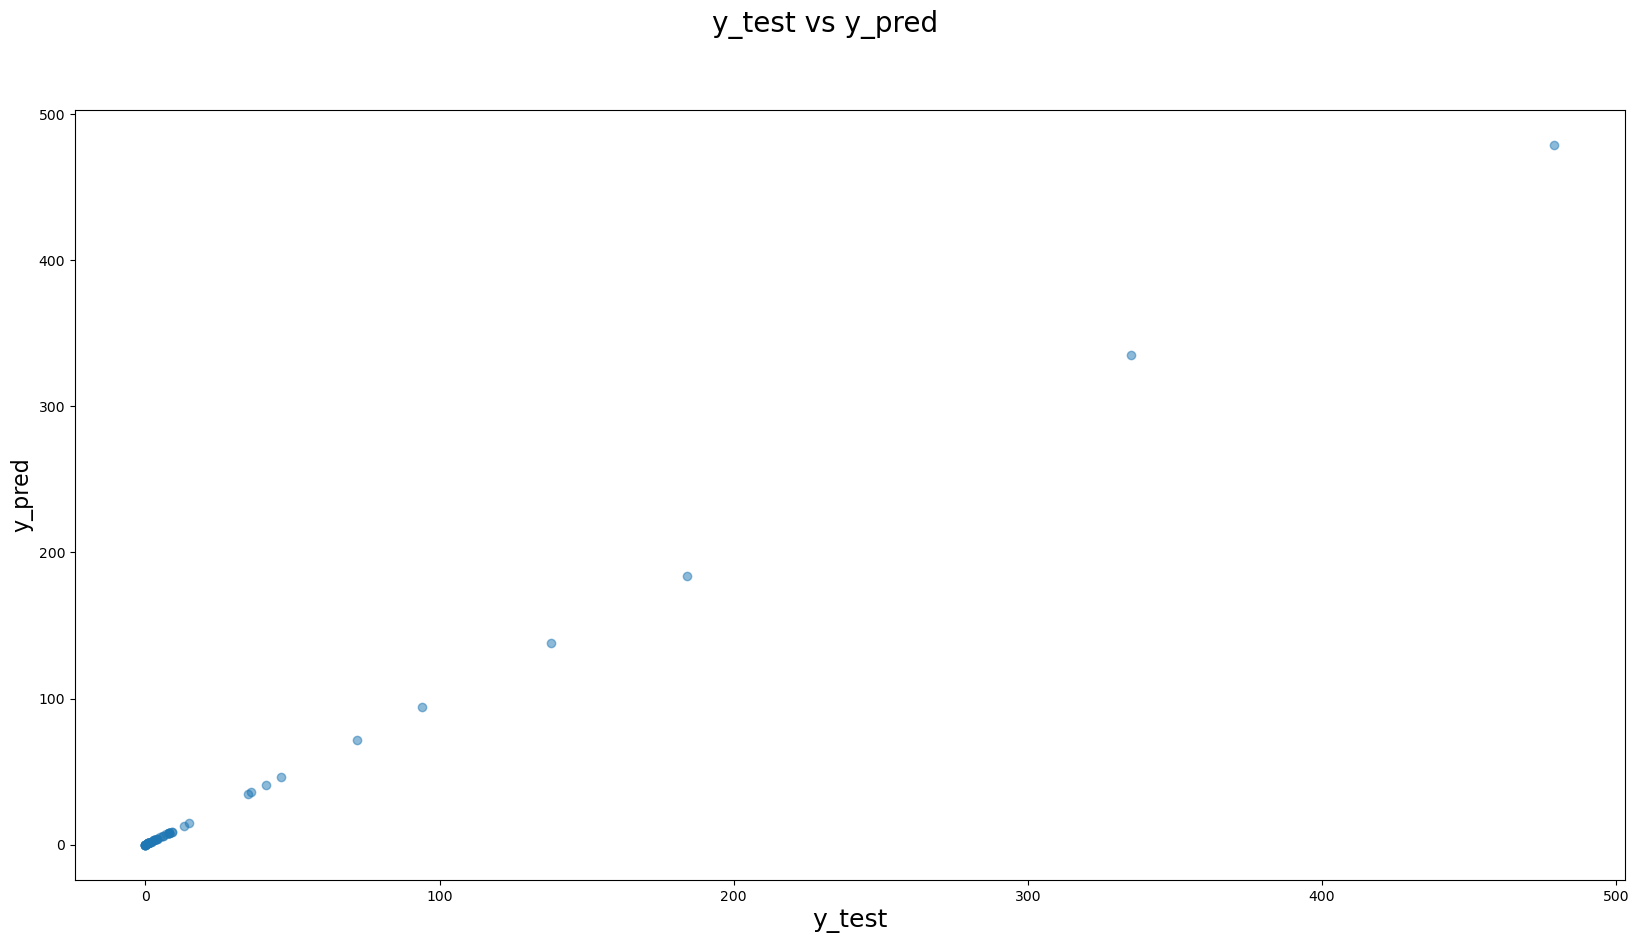

In [24]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [25]:
df = pd.DataFrame({'Actual': y_test, 'Predictions': y_pred})
df['Predictions'] = round(df['Predictions'], 2)
df

,Actual,Predictions
225,1,1.0
122,1,1.0
92,4,4.0
157,0,0.0
154,1,1.0
161,0,0.0
198,5,5.0
83,6,6.0
63,36,36.0
155,1,1.0


In [26]:
metrics.explained_variance_score(y_test, y_pred)

0.9999999999730012

In [27]:
metrics.mean_absolute_error(y_test, y_pred)

0.0003913572933185018

In [28]:
metrics.max_error(y_test, y_pred)

0.0018246407324795655

In [29]:
metrics.mean_squared_error(y_test, y_pred)

2.376950004771142e-07

In [30]:
metrics.r2_score(y_test, y_pred)

0.9999999999673318

In [31]:
alpha = [0.0001, 0.001, 0.1, 1, 10, 100, 1000]
max_iter = [1, 10, 100]
lasso_gscv = GridSearchCV(estimator=Lasso(),
                          param_grid={'alpha': alpha,
                                      'max_iter': max_iter},
                                      scoring='neg_mean_absolute_error',
                                      cv=5,
                                      refit=False)

In [32]:
lasso_gscv.fit(x, y)
lasso_gscv.best_params_

{'alpha': 0.0001, 'max_iter': 100}

In [33]:
lasso = Lasso(alpha=lasso_gscv.best_params_['alpha'],
              max_iter=lasso_gscv.best_params_['max_iter'])
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=100)

In [ ]:
print("Training set score: {:.2f}".format(lasso.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(x_test, y_test)))